In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("../data/raw/kidney_disease_dataset.csv")
df.head()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease


C:\Users\OSHITH\AppData\Local\Temp\ipykernel_16336\3342817226.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df, palette='viridis')


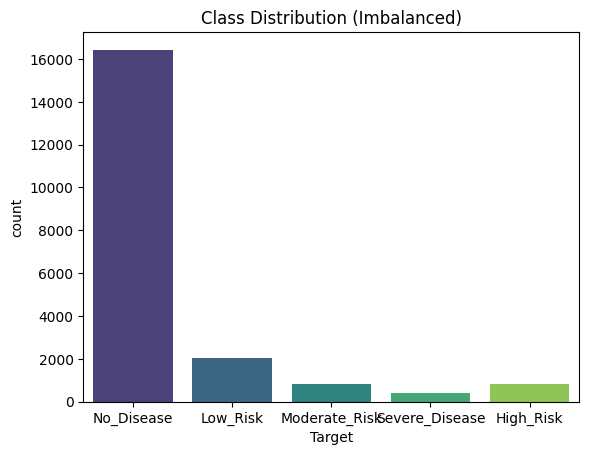

In [33]:
sns.countplot(x='Target', data=df, palette='viridis')
plt.title('Class Distribution (Imbalanced)')
plt.savefig('../reports/figures/classDistribution.png')
plt.show()

In [34]:
numCols = df.select_dtypes(include=['float64', 'int64']).columns
df[numCols] = df[numCols].fillna(df[numCols].median())

catCols = df.select_dtypes(include=['object']).columns
df[catCols] = df[catCols].fillna(df[catCols].mode().iloc[0])

In [35]:
targetMapping = {
    'No_Disease': 0,
    'Low_Risk': 1,
    'Moderate_Risk': 2,
    'Severe_Disease': 3,
    'High_Risk': 4
}
df['Target'] = df['Target'].map(targetMapping)

In [36]:
df.to_csv('../data/processed/cleanedData.csv', index=False)